In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objects as go
import plotly.express as px
from matplotlib import style
style.use("fivethirtyeight")

In [2]:
dataset=pd.read_csv("IRIS.csv")
dataset.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [3]:
dataset.describe().transpose()

count      mean       std  min  25%   50%  75%  max
sepal_length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal_width   150.0  3.054000  0.433594  2.0  2.8  3.00  3.3  4.4
petal_length  150.0  3.758667  1.764420  1.0  1.6  4.35  5.1  6.9
petal_width   150.0  1.198667  0.763161  0.1  0.3  1.30  1.8  2.5

In [4]:
dataset.corr()

sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000

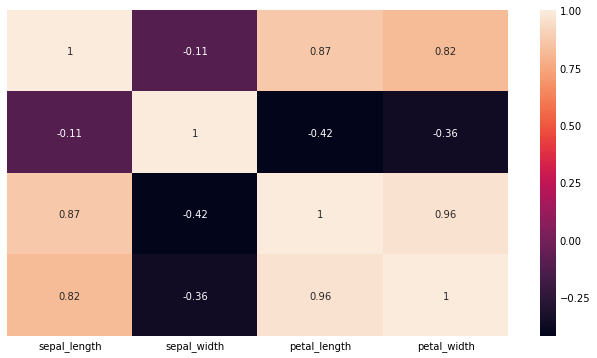

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(),annot=True,yticklabels=False)

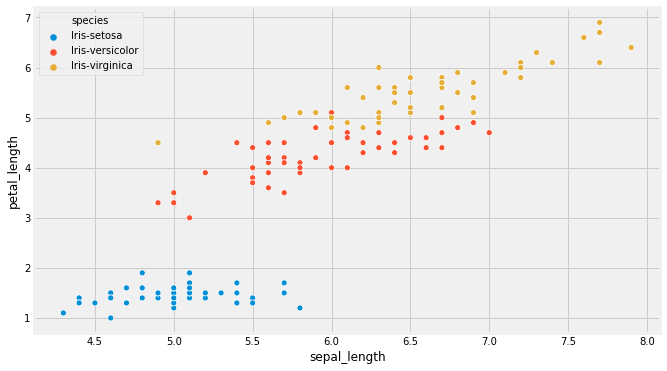

In [6]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="sepal_length",y="petal_length",data=dataset,hue="species")

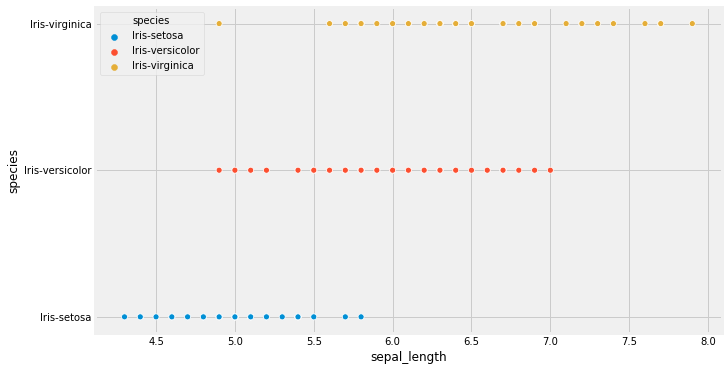

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="sepal_length",y="species",data=dataset,hue="species")

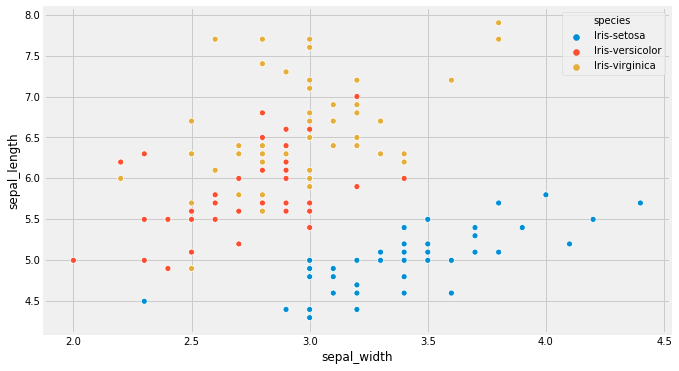

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="sepal_width",y="sepal_length",data=dataset,hue="species")

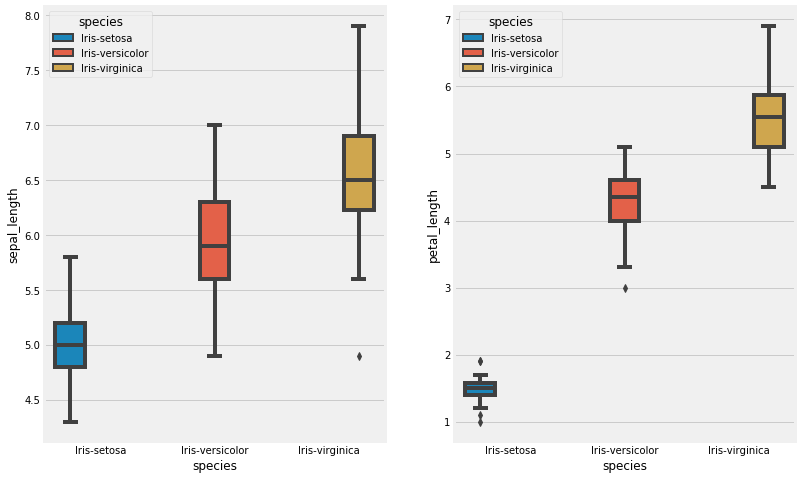

In [9]:
ax=plt.figure(figsize=(12,8))
ax.add_subplot(121)
sns.boxplot(x="species",y="sepal_length",data=dataset,hue="species")
ax.add_subplot(122)
sns.boxplot(x="species",y="petal_length",data=dataset,hue="species")

<Figure size 720x432 with 0 Axes>

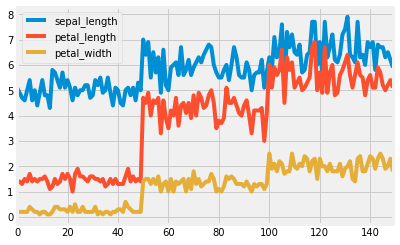

In [10]:
plt.figure(figsize=(10,6))
dataset[["sepal_length","petal_length","petal_width"]].plot()

In [11]:
df=dataset[["sepal_length","petal_length","petal_width"]]

In [12]:
fig=go.Figure(data=[go.Surface(z=df.values)])
fig.update_layout(title="Iris dataset",autosize=False,
           width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [13]:
fig=go.Figure(data=[go.Surface(z=df.values)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title="Iris dataset",autosize=False,
           width=500, height=500,
           scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
            margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
encoding=LabelEncoder()
dataset["speciesID"]=encoding.fit_transform(dataset["species"])

In [15]:
fig=px.parallel_coordinates(dataset,color="speciesID",labels={"species":"Species",
                                                           "sepal_width":"sepal width",
                                                           "sepal_length":"sepal length",
                                                           "petal_length":"petal length",
                                                           "petal_width":"petal width"},
                           color_continuous_scale=px.colors.diverging.Tealrose,
                           color_continuous_midpoint=2)
fig.show()

In [16]:
fig = px.scatter_3d(df, x="sepal_length", y="petal_length", z="petal_width")
fig.show()

<Figure size 720x432 with 0 Axes>

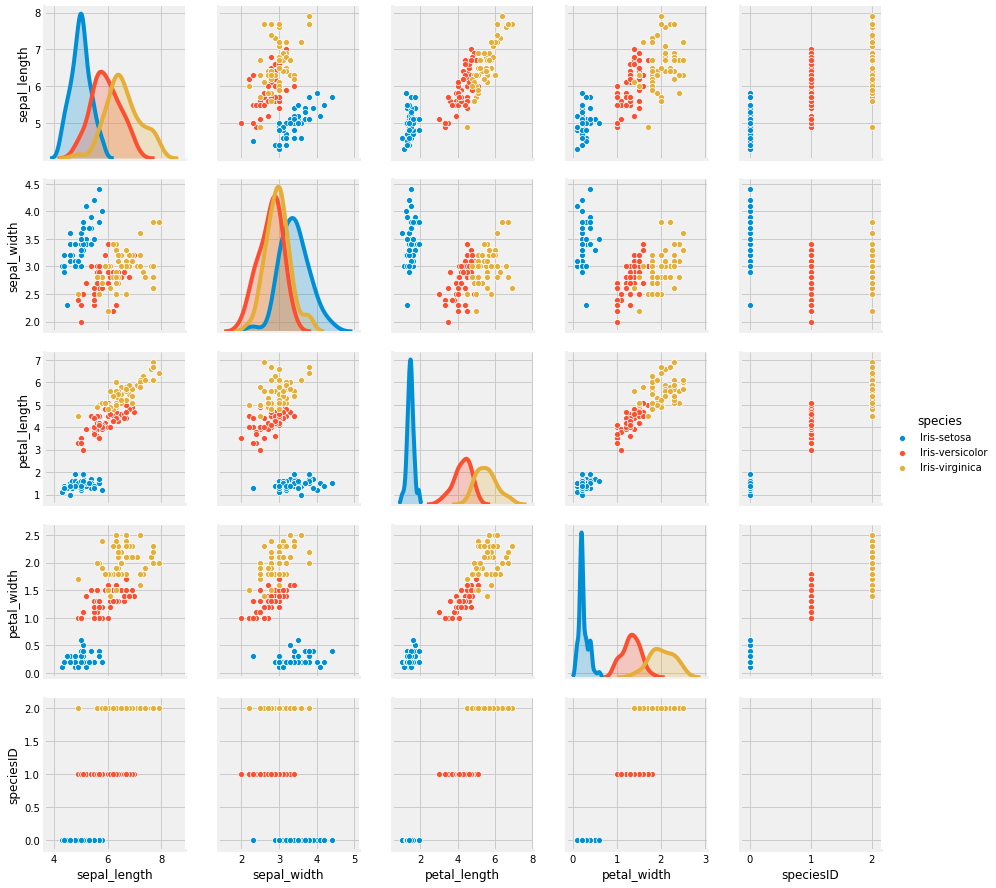

In [17]:
plt.figure(figsize=(10,6))
sns.pairplot(dataset,hue="species")

In [18]:
#lets consider only two species
newdata=dataset[dataset["species"]!="Iris-virginica"]
newdata.head()

sepal_length  sepal_width  petal_length  petal_width      species  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

   speciesID  
0          0  
1          0  
2          0  
3          0  
4          0

In [19]:
x=newdata.drop(["sepal_length","sepal_width","species","speciesID"],axis=1)
y=newdata["speciesID"]

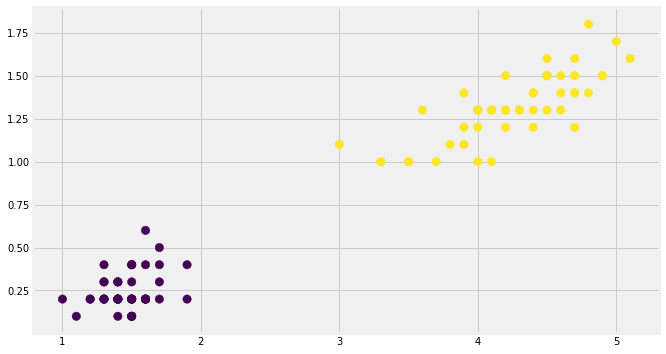

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(x["petal_length"],x["petal_width"],c=y,s=70)

In [21]:
from sklearn.svm import SVC

In [22]:
model=SVC(kernel="linear",C=1)
model.fit(x,y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [23]:
sp=model.support_vectors_
sp

array([[1.9, 0.4],
       [3. , 1.1]])

Text(0.5, 1.0, 'support vector points')

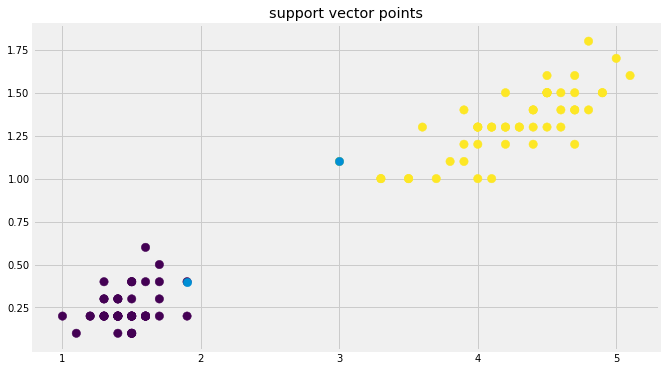

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(x["petal_length"],x["petal_width"],c=y,s=70)
plt.scatter(sp[:,0],sp[:,1],s=70)
plt.title("support vector points")

In [25]:
def svm(c):
    model=SVC(kernel="linear",C=c)
    model.fit(x,y)
    ax=plt.gca()
    plt.scatter(x["petal_length"],x["petal_width"],c=y,s=50)
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    xx=np.linspace(xlim[0],xlim[1],30)
    yy=np.linspace(ylim[0],ylim[1],30)
    XX,YY=np.meshgrid(xx,yy)
    xy=np.vstack([XX.ravel(), YY.ravel()]).T
    Z=model.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
    plt.scatter(sp[:,0],sp[:,1],s=100,facecolors=None,edgecolors="k",linewidth=1)
    plt.show()

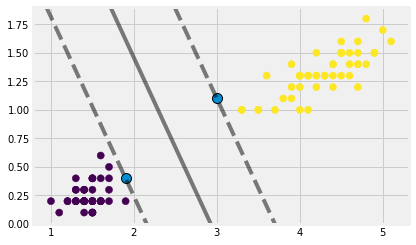

In [26]:
svm(10)

In [27]:
x=np.array(dataset[["sepal_length","petal_length"]])
y=np.array(dataset["speciesID"])

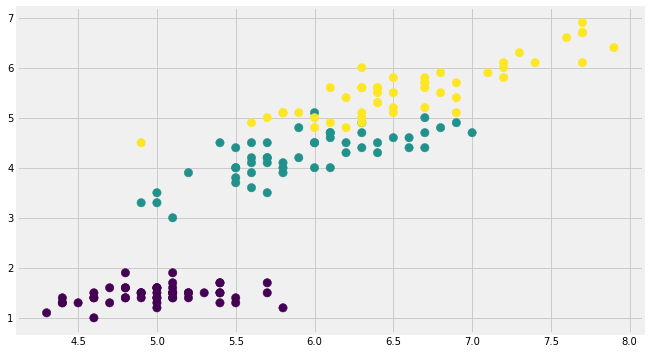

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1],c=y,s=70)

In [29]:
def svm(kernel,c,gamma,d):
    model1=SVC(kernel=kernel,C=c,gamma=gamma,degree=d)
    model1.fit(x,y)
    sp=model1.support_vectors_
    x_min,x_max=x[:,0].min()-1,x[:,0].max()+1
    y_min,y_max=x[:,1].min()-1.5,x[:,1].max()+1
    height=(x_max/x_min)/100
    xx,yy=np.meshgrid(np.arange(x_min,x_max,height),np.arange(y_min,y_max,height))
    z=model1.predict(np.c_[xx.ravel(),yy.ravel()])
    z=z.reshape(xx.shape)
    plt.figure(figsize=(10,6))
    plt.contourf(xx,yy,z,cmap=plt.cm.Paired,alpha=0.5)
    plt.scatter(x[:,0],x[:,1],cmap=plt.cm.Paired,c=y)
    plt.xlim(xx.min(),xx.max())
    plt.xlabel("sepal length")
    plt.ylabel("petal length")
    plt.title(f"kernel is {kernel} with c={c},gamma={gamma},degree={d} ")
    plt.show()

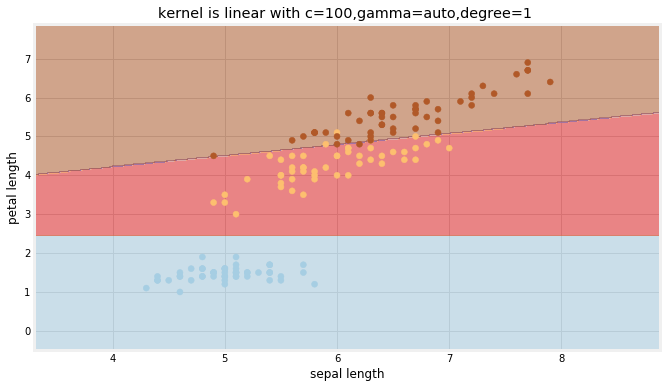

In [30]:
svm('linear',100,'auto',1)

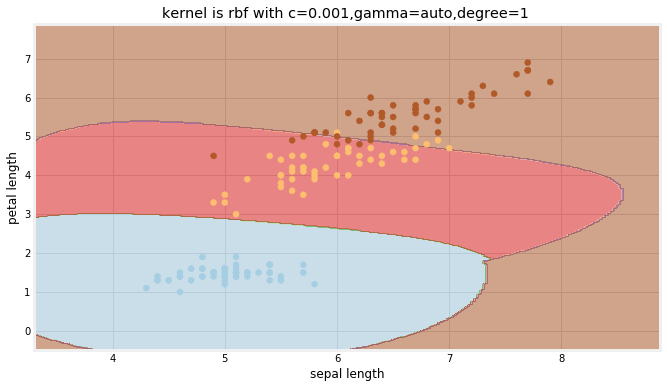

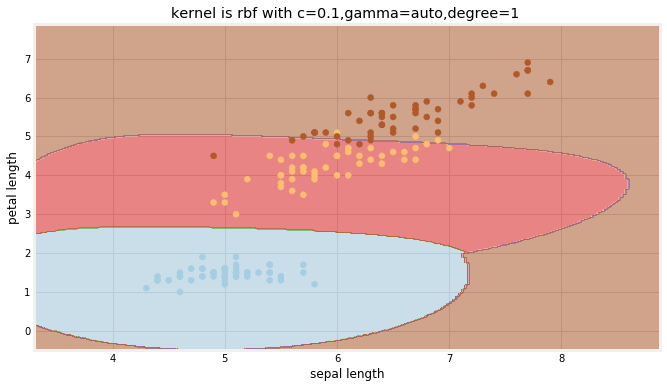

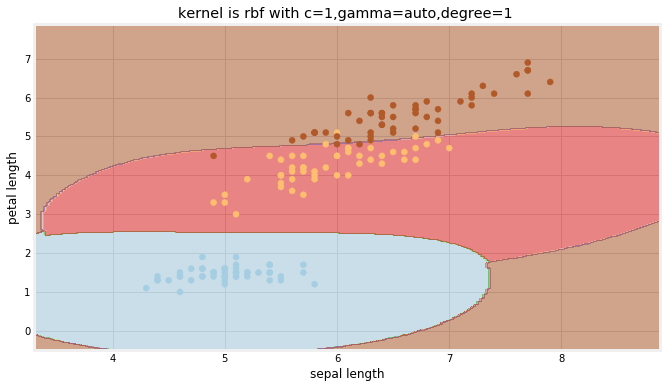

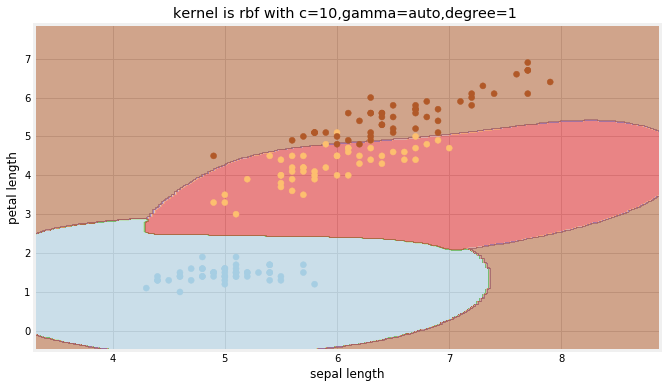

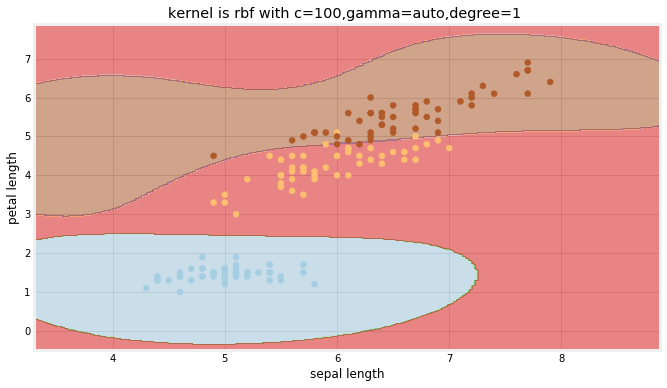

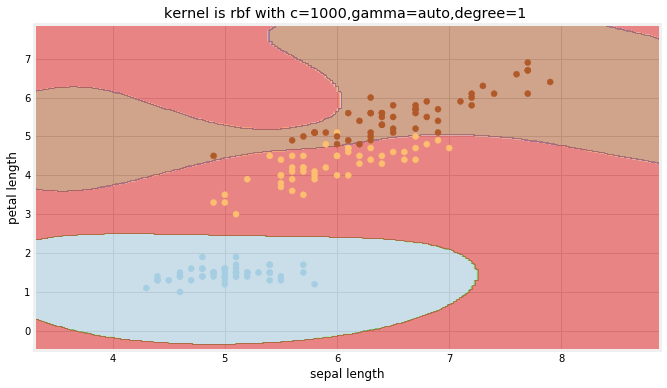

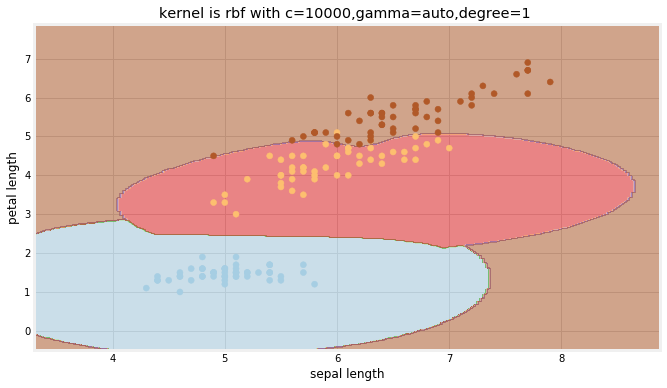

In [31]:
c=[0.001,0.1,1,10,100,1000,10000]
for i in c:
    svm('rbf',i,'auto',1)

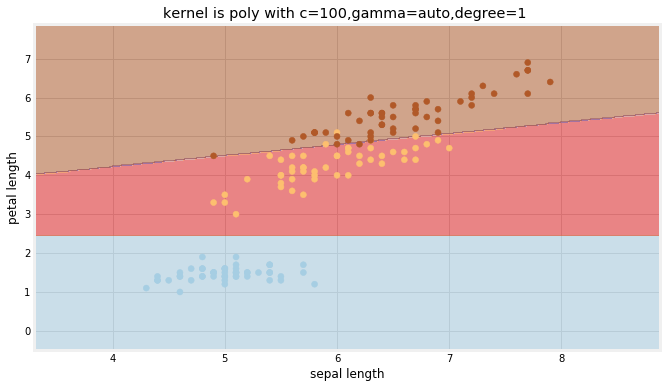

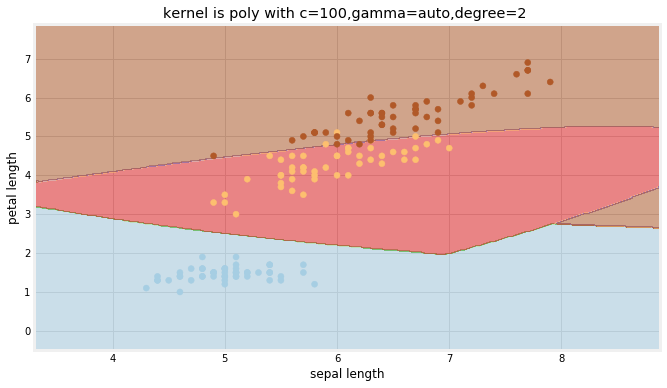

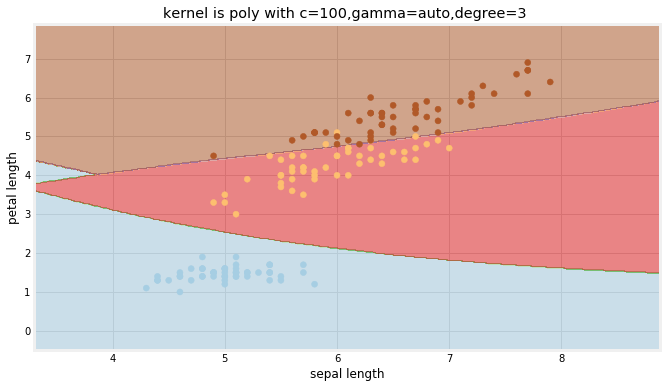

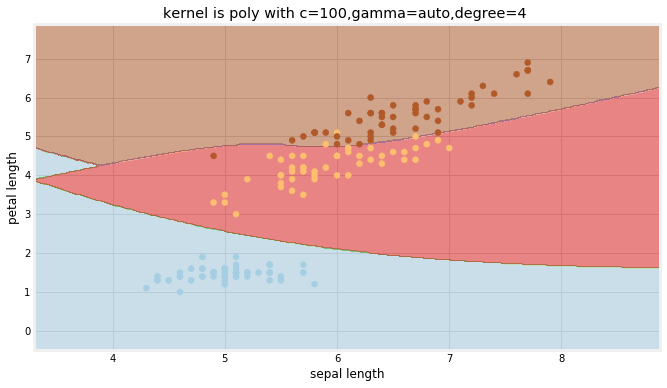

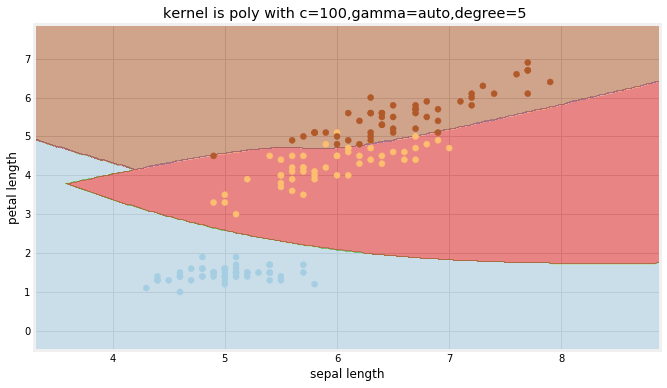

In [32]:
d=[1,2,3,4,5]
for j in d:
    svm('poly',100,'auto',j)

In [33]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [34]:
x=dataset.drop(["species","speciesID"],axis=1)
y=dataset["speciesID"]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=6)

In [35]:
param_grid={'C':[1,10,0.1,0.01,100,1000],
            'gamma':[1,10,0.1,0.01,0.001,0.0001],
            'degree':[1,2,3,4,5,6],
            'kernel':["rbf","linear","poly"]
           }
grid_svm=GridSearchCV(SVC(),param_grid,verbose=3)
grid_svm.fit(x_train,y_train)
print(grid_svm.best_estimator_)
print(grid_svm.best_params_)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
[CV] C=1, degree=1, gamma=1, kernel=rbf ..............................
[CV] .. C=1, degree=1, gamma=1, kernel=rbf, score=0.974, total=   0.0s
[CV] C=1, degree=1, gamma=1, kernel=rbf ..............................
[CV] .. C=1, degree=1, gamma=1, kernel=rbf, score=0.974, total=   0.0s
[CV] C=1, degree=1, gamma=1, kernel=rbf ..............................
[CV] .. C=1, degree=1, gamma=1, kernel=rbf, score=0.917, total=   0.0s
[CV] C=1, degree=1, gamma=1, kernel=linear ...........................
[CV]  C=1, degree=1, gamma=1, kernel=linear, score=0.974, total=   0.0s
[CV] C=1, degree=1, gamma=1, kernel=linear ...........................
[CV]  C=1, degree=1, gamma=1, kernel=linear, score=0.974, total=   0.0s
[CV] C=1, degree=1, gamma=1, kernel=linear ...........................
[CV]  C=1, degree=1, gamma=1, kernel=linear, score=0.917, total=   0.0s
[CV] C=1, degree=1, gamma=1, kernel=poly .............................
[CV] . C=1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, degree=1, gamma=0.1, kernel=linear, score=0.917, total=   0.0s
[CV] C=1, degree=1, gamma=0.1, kernel=poly ...........................
[CV]  C=1, degree=1, gamma=0.1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1, degree=1, gamma=0.1, kernel=poly ...........................
[CV]  C=1, degree=1, gamma=0.1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1, degree=1, gamma=0.1, kernel=poly ...........................
[CV]  C=1, degree=1, gamma=0.1, kernel=poly, score=0.889, total=   0.0s
[CV] C=1, degree=1, gamma=0.01, kernel=rbf ...........................
[CV]  C=1, degree=1, gamma=0.01, kernel=rbf, score=0.921, total=   0.0s
[CV] C=1, degree=1, gamma=0.01, kernel=rbf ...........................
[CV]  C=1, degree=1, gamma=0.01, kernel=rbf, score=0.974, total=   0.0s
[CV] C=1, degree=1, gamma=0.01, kernel=rbf ...........................
[CV]  C=1, degree=1, gamma=0.01, kernel=rbf, score=0.833, total=   0.0s
[CV] C=1, degree=1, gamma=0.01, kernel=linear ......................

[CV]  C=1, degree=2, gamma=0.0001, kernel=linear, score=0.974, total=   0.0s
[CV] C=1, degree=2, gamma=0.0001, kernel=linear ......................
[CV]  C=1, degree=2, gamma=0.0001, kernel=linear, score=0.917, total=   0.0s
[CV] C=1, degree=2, gamma=0.0001, kernel=poly ........................
[CV]  C=1, degree=2, gamma=0.0001, kernel=poly, score=0.658, total=   0.0s
[CV] C=1, degree=2, gamma=0.0001, kernel=poly ........................
[CV]  C=1, degree=2, gamma=0.0001, kernel=poly, score=0.658, total=   0.0s
[CV] C=1, degree=2, gamma=0.0001, kernel=poly ........................
[CV]  C=1, degree=2, gamma=0.0001, kernel=poly, score=0.639, total=   0.0s
[CV] C=1, degree=3, gamma=1, kernel=rbf ..............................
[CV] .. C=1, degree=3, gamma=1, kernel=rbf, score=0.974, total=   0.0s
[CV] C=1, degree=3, gamma=1, kernel=rbf ..............................
[CV] .. C=1, degree=3, gamma=1, kernel=rbf, score=0.974, total=   0.0s
[CV] C=1, degree=3, gamma=1, kernel=rbf .............

[CV]  C=1, degree=3, gamma=0.0001, kernel=poly, score=0.632, total=   0.0s
[CV] C=1, degree=3, gamma=0.0001, kernel=poly ........................
[CV]  C=1, degree=3, gamma=0.0001, kernel=poly, score=0.583, total=   0.0s
[CV] C=1, degree=4, gamma=1, kernel=rbf ..............................
[CV] .. C=1, degree=4, gamma=1, kernel=rbf, score=0.974, total=   0.0s
[CV] C=1, degree=4, gamma=1, kernel=rbf ..............................
[CV] .. C=1, degree=4, gamma=1, kernel=rbf, score=0.974, total=   0.0s
[CV] C=1, degree=4, gamma=1, kernel=rbf ..............................
[CV] .. C=1, degree=4, gamma=1, kernel=rbf, score=0.917, total=   0.0s
[CV] C=1, degree=4, gamma=1, kernel=linear ...........................
[CV]  C=1, degree=4, gamma=1, kernel=linear, score=0.974, total=   0.0s
[CV] C=1, degree=4, gamma=1, kernel=linear ...........................
[CV]  C=1, degree=4, gamma=1, kernel=linear, score=0.974, total=   0.0s
[CV] C=1, degree=4, gamma=1, kernel=linear ........................

[CV]  C=1, degree=5, gamma=0.1, kernel=linear, score=0.974, total=   0.0s
[CV] C=1, degree=5, gamma=0.1, kernel=linear .........................
[CV]  C=1, degree=5, gamma=0.1, kernel=linear, score=0.917, total=   0.0s
[CV] C=1, degree=5, gamma=0.1, kernel=poly ...........................
[CV]  C=1, degree=5, gamma=0.1, kernel=poly, score=0.974, total=   0.0s
[CV] C=1, degree=5, gamma=0.1, kernel=poly ...........................
[CV]  C=1, degree=5, gamma=0.1, kernel=poly, score=0.947, total=   0.0s
[CV] C=1, degree=5, gamma=0.1, kernel=poly ...........................
[CV]  C=1, degree=5, gamma=0.1, kernel=poly, score=0.917, total=   0.0s
[CV] C=1, degree=5, gamma=0.01, kernel=rbf ...........................
[CV]  C=1, degree=5, gamma=0.01, kernel=rbf, score=0.921, total=   0.0s
[CV] C=1, degree=5, gamma=0.01, kernel=rbf ...........................
[CV]  C=1, degree=5, gamma=0.01, kernel=rbf, score=0.974, total=   0.0s
[CV] C=1, degree=5, gamma=0.01, kernel=rbf .......................

[CV]  C=1, degree=6, gamma=0.1, kernel=poly, score=0.917, total=   0.0s
[CV] C=1, degree=6, gamma=0.01, kernel=rbf ...........................
[CV]  C=1, degree=6, gamma=0.01, kernel=rbf, score=0.921, total=   0.0s
[CV] C=1, degree=6, gamma=0.01, kernel=rbf ...........................
[CV]  C=1, degree=6, gamma=0.01, kernel=rbf, score=0.974, total=   0.0s
[CV] C=1, degree=6, gamma=0.01, kernel=rbf ...........................
[CV]  C=1, degree=6, gamma=0.01, kernel=rbf, score=0.833, total=   0.0s
[CV] C=1, degree=6, gamma=0.01, kernel=linear ........................
[CV]  C=1, degree=6, gamma=0.01, kernel=linear, score=0.974, total=   0.0s
[CV] C=1, degree=6, gamma=0.01, kernel=linear ........................
[CV]  C=1, degree=6, gamma=0.01, kernel=linear, score=0.974, total=   0.0s
[CV] C=1, degree=6, gamma=0.01, kernel=linear ........................
[CV]  C=1, degree=6, gamma=0.01, kernel=linear, score=0.917, total=   0.0s
[CV] C=1, degree=6, gamma=0.01, kernel=poly .................

[CV] . C=10, degree=2, gamma=1, kernel=rbf, score=0.917, total=   0.0s
[CV] C=10, degree=2, gamma=1, kernel=linear ..........................
[CV]  C=10, degree=2, gamma=1, kernel=linear, score=0.974, total=   0.0s
[CV] C=10, degree=2, gamma=1, kernel=linear ..........................
[CV]  C=10, degree=2, gamma=1, kernel=linear, score=0.947, total=   0.0s
[CV] C=10, degree=2, gamma=1, kernel=linear ..........................
[CV]  C=10, degree=2, gamma=1, kernel=linear, score=0.917, total=   0.0s
[CV] C=10, degree=2, gamma=1, kernel=poly ............................
[CV]  C=10, degree=2, gamma=1, kernel=poly, score=0.974, total=   0.0s
[CV] C=10, degree=2, gamma=1, kernel=poly ............................
[CV]  C=10, degree=2, gamma=1, kernel=poly, score=0.947, total=   0.0s
[CV] C=10, degree=2, gamma=1, kernel=poly ............................
[CV]  C=10, degree=2, gamma=1, kernel=poly, score=0.917, total=   0.0s
[CV] C=10, degree=2, gamma=10, kernel=rbf ............................


[CV]  C=10, degree=3, gamma=10, kernel=poly, score=0.917, total=   0.0s
[CV] C=10, degree=3, gamma=0.1, kernel=rbf ...........................
[CV]  C=10, degree=3, gamma=0.1, kernel=rbf, score=0.974, total=   0.0s
[CV] C=10, degree=3, gamma=0.1, kernel=rbf ...........................
[CV]  C=10, degree=3, gamma=0.1, kernel=rbf, score=0.974, total=   0.0s
[CV] C=10, degree=3, gamma=0.1, kernel=rbf ...........................
[CV]  C=10, degree=3, gamma=0.1, kernel=rbf, score=0.944, total=   0.0s
[CV] C=10, degree=3, gamma=0.1, kernel=linear ........................
[CV]  C=10, degree=3, gamma=0.1, kernel=linear, score=0.974, total=   0.0s
[CV] C=10, degree=3, gamma=0.1, kernel=linear ........................
[CV]  C=10, degree=3, gamma=0.1, kernel=linear, score=0.947, total=   0.0s
[CV] C=10, degree=3, gamma=0.1, kernel=linear ........................
[CV]  C=10, degree=3, gamma=0.1, kernel=linear, score=0.917, total=   0.0s
[CV] C=10, degree=3, gamma=0.1, kernel=poly .................

[CV]  C=10, degree=4, gamma=0.0001, kernel=rbf, score=0.667, total=   0.0s
[CV] C=10, degree=4, gamma=0.0001, kernel=linear .....................
[CV]  C=10, degree=4, gamma=0.0001, kernel=linear, score=0.974, total=   0.0s
[CV] C=10, degree=4, gamma=0.0001, kernel=linear .....................
[CV]  C=10, degree=4, gamma=0.0001, kernel=linear, score=0.947, total=   0.0s
[CV] C=10, degree=4, gamma=0.0001, kernel=linear .....................
[CV]  C=10, degree=4, gamma=0.0001, kernel=linear, score=0.917, total=   0.0s
[CV] C=10, degree=4, gamma=0.0001, kernel=poly .......................
[CV]  C=10, degree=4, gamma=0.0001, kernel=poly, score=0.526, total=   0.0s
[CV] C=10, degree=4, gamma=0.0001, kernel=poly .......................
[CV]  C=10, degree=4, gamma=0.0001, kernel=poly, score=0.553, total=   0.0s
[CV] C=10, degree=4, gamma=0.0001, kernel=poly .......................
[CV]  C=10, degree=4, gamma=0.0001, kernel=poly, score=0.556, total=   0.0s
[CV] C=10, degree=5, gamma=1, kernel=

[CV]  C=10, degree=6, gamma=0.1, kernel=rbf, score=0.974, total=   0.0s
[CV] C=10, degree=6, gamma=0.1, kernel=rbf ...........................
[CV]  C=10, degree=6, gamma=0.1, kernel=rbf, score=0.944, total=   0.0s
[CV] C=10, degree=6, gamma=0.1, kernel=linear ........................
[CV]  C=10, degree=6, gamma=0.1, kernel=linear, score=0.974, total=   0.0s
[CV] C=10, degree=6, gamma=0.1, kernel=linear ........................
[CV]  C=10, degree=6, gamma=0.1, kernel=linear, score=0.947, total=   0.0s
[CV] C=10, degree=6, gamma=0.1, kernel=linear ........................
[CV]  C=10, degree=6, gamma=0.1, kernel=linear, score=0.917, total=   0.0s
[CV] C=10, degree=6, gamma=0.1, kernel=poly ..........................
[CV]  C=10, degree=6, gamma=0.1, kernel=poly, score=0.974, total=   0.0s
[CV] C=10, degree=6, gamma=0.1, kernel=poly ..........................
[CV]  C=10, degree=6, gamma=0.1, kernel=poly, score=0.947, total=   0.0s
[CV] C=10, degree=6, gamma=0.1, kernel=poly ...............

[CV]  C=0.1, degree=1, gamma=0.001, kernel=poly, score=0.684, total=   0.0s
[CV] C=0.1, degree=1, gamma=0.001, kernel=poly .......................
[CV]  C=0.1, degree=1, gamma=0.001, kernel=poly, score=0.658, total=   0.0s
[CV] C=0.1, degree=1, gamma=0.001, kernel=poly .......................
[CV]  C=0.1, degree=1, gamma=0.001, kernel=poly, score=0.667, total=   0.0s
[CV] C=0.1, degree=1, gamma=0.0001, kernel=rbf .......................
[CV]  C=0.1, degree=1, gamma=0.0001, kernel=rbf, score=0.684, total=   0.0s
[CV] C=0.1, degree=1, gamma=0.0001, kernel=rbf .......................
[CV]  C=0.1, degree=1, gamma=0.0001, kernel=rbf, score=0.658, total=   0.0s
[CV] C=0.1, degree=1, gamma=0.0001, kernel=rbf .......................
[CV]  C=0.1, degree=1, gamma=0.0001, kernel=rbf, score=0.667, total=   0.0s
[CV] C=0.1, degree=1, gamma=0.0001, kernel=linear ....................
[CV]  C=0.1, degree=1, gamma=0.0001, kernel=linear, score=0.974, total=   0.0s
[CV] C=0.1, degree=1, gamma=0.0001, ker

[CV]  C=0.1, degree=2, gamma=0.0001, kernel=rbf, score=0.684, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.0001, kernel=rbf .......................
[CV]  C=0.1, degree=2, gamma=0.0001, kernel=rbf, score=0.658, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.0001, kernel=rbf .......................
[CV]  C=0.1, degree=2, gamma=0.0001, kernel=rbf, score=0.667, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.0001, kernel=linear ....................
[CV]  C=0.1, degree=2, gamma=0.0001, kernel=linear, score=0.974, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.0001, kernel=linear ....................
[CV]  C=0.1, degree=2, gamma=0.0001, kernel=linear, score=1.000, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.0001, kernel=linear ....................
[CV]  C=0.1, degree=2, gamma=0.0001, kernel=linear, score=0.889, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.0001, kernel=poly ......................
[CV]  C=0.1, degree=2, gamma=0.0001, kernel=poly, score=0.658, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.00

[CV]  C=0.1, degree=4, gamma=10, kernel=linear, score=0.974, total=   0.0s
[CV] C=0.1, degree=4, gamma=10, kernel=linear ........................
[CV]  C=0.1, degree=4, gamma=10, kernel=linear, score=1.000, total=   0.0s
[CV] C=0.1, degree=4, gamma=10, kernel=linear ........................
[CV]  C=0.1, degree=4, gamma=10, kernel=linear, score=0.889, total=   0.0s
[CV] C=0.1, degree=4, gamma=10, kernel=poly ..........................
[CV]  C=0.1, degree=4, gamma=10, kernel=poly, score=0.974, total=   0.0s
[CV] C=0.1, degree=4, gamma=10, kernel=poly ..........................
[CV]  C=0.1, degree=4, gamma=10, kernel=poly, score=0.947, total=   0.0s
[CV] C=0.1, degree=4, gamma=10, kernel=poly ..........................
[CV]  C=0.1, degree=4, gamma=10, kernel=poly, score=0.917, total=   0.0s
[CV] C=0.1, degree=4, gamma=0.1, kernel=rbf ..........................
[CV]  C=0.1, degree=4, gamma=0.1, kernel=rbf, score=0.895, total=   0.0s
[CV] C=0.1, degree=4, gamma=0.1, kernel=rbf .............

[CV]  C=0.1, degree=5, gamma=0.1, kernel=linear, score=1.000, total=   0.0s
[CV] C=0.1, degree=5, gamma=0.1, kernel=linear .......................
[CV]  C=0.1, degree=5, gamma=0.1, kernel=linear, score=0.889, total=   0.0s
[CV] C=0.1, degree=5, gamma=0.1, kernel=poly .........................
[CV]  C=0.1, degree=5, gamma=0.1, kernel=poly, score=0.974, total=   0.0s
[CV] C=0.1, degree=5, gamma=0.1, kernel=poly .........................
[CV]  C=0.1, degree=5, gamma=0.1, kernel=poly, score=0.947, total=   0.0s
[CV] C=0.1, degree=5, gamma=0.1, kernel=poly .........................
[CV]  C=0.1, degree=5, gamma=0.1, kernel=poly, score=0.917, total=   0.0s
[CV] C=0.1, degree=5, gamma=0.01, kernel=rbf .........................
[CV]  C=0.1, degree=5, gamma=0.01, kernel=rbf, score=0.684, total=   0.0s
[CV] C=0.1, degree=5, gamma=0.01, kernel=rbf .........................
[CV]  C=0.1, degree=5, gamma=0.01, kernel=rbf, score=0.658, total=   0.0s
[CV] C=0.1, degree=5, gamma=0.01, kernel=rbf .......

[CV]  C=0.1, degree=6, gamma=0.1, kernel=poly, score=0.917, total=   0.0s
[CV] C=0.1, degree=6, gamma=0.01, kernel=rbf .........................
[CV]  C=0.1, degree=6, gamma=0.01, kernel=rbf, score=0.684, total=   0.0s
[CV] C=0.1, degree=6, gamma=0.01, kernel=rbf .........................
[CV]  C=0.1, degree=6, gamma=0.01, kernel=rbf, score=0.658, total=   0.0s
[CV] C=0.1, degree=6, gamma=0.01, kernel=rbf .........................
[CV]  C=0.1, degree=6, gamma=0.01, kernel=rbf, score=0.667, total=   0.0s
[CV] C=0.1, degree=6, gamma=0.01, kernel=linear ......................
[CV]  C=0.1, degree=6, gamma=0.01, kernel=linear, score=0.974, total=   0.0s
[CV] C=0.1, degree=6, gamma=0.01, kernel=linear ......................
[CV]  C=0.1, degree=6, gamma=0.01, kernel=linear, score=1.000, total=   0.0s
[CV] C=0.1, degree=6, gamma=0.01, kernel=linear ......................
[CV]  C=0.1, degree=6, gamma=0.01, kernel=linear, score=0.889, total=   0.0s
[CV] C=0.1, degree=6, gamma=0.01, kernel=poly .

[CV]  C=0.01, degree=1, gamma=0.001, kernel=poly, score=0.667, total=   0.0s
[CV] C=0.01, degree=1, gamma=0.0001, kernel=rbf ......................
[CV]  C=0.01, degree=1, gamma=0.0001, kernel=rbf, score=0.684, total=   0.0s
[CV] C=0.01, degree=1, gamma=0.0001, kernel=rbf ......................
[CV]  C=0.01, degree=1, gamma=0.0001, kernel=rbf, score=0.658, total=   0.0s
[CV] C=0.01, degree=1, gamma=0.0001, kernel=rbf ......................
[CV]  C=0.01, degree=1, gamma=0.0001, kernel=rbf, score=0.667, total=   0.0s
[CV] C=0.01, degree=1, gamma=0.0001, kernel=linear ...................
[CV]  C=0.01, degree=1, gamma=0.0001, kernel=linear, score=0.868, total=   0.0s
[CV] C=0.01, degree=1, gamma=0.0001, kernel=linear ...................
[CV]  C=0.01, degree=1, gamma=0.0001, kernel=linear, score=0.895, total=   0.0s
[CV] C=0.01, degree=1, gamma=0.0001, kernel=linear ...................
[CV]  C=0.01, degree=1, gamma=0.0001, kernel=linear, score=0.806, total=   0.0s
[CV] C=0.01, degree=1, gam

[CV]  C=0.01, degree=3, gamma=10, kernel=linear, score=0.806, total=   0.0s
[CV] C=0.01, degree=3, gamma=10, kernel=poly .........................
[CV]  C=0.01, degree=3, gamma=10, kernel=poly, score=0.974, total=   0.0s
[CV] C=0.01, degree=3, gamma=10, kernel=poly .........................
[CV]  C=0.01, degree=3, gamma=10, kernel=poly, score=0.947, total=   0.0s
[CV] C=0.01, degree=3, gamma=10, kernel=poly .........................
[CV]  C=0.01, degree=3, gamma=10, kernel=poly, score=0.917, total=   0.0s
[CV] C=0.01, degree=3, gamma=0.1, kernel=rbf .........................
[CV]  C=0.01, degree=3, gamma=0.1, kernel=rbf, score=0.684, total=   0.0s
[CV] C=0.01, degree=3, gamma=0.1, kernel=rbf .........................
[CV]  C=0.01, degree=3, gamma=0.1, kernel=rbf, score=0.684, total=   0.0s
[CV] C=0.01, degree=3, gamma=0.1, kernel=rbf .........................
[CV]  C=0.01, degree=3, gamma=0.1, kernel=rbf, score=0.667, total=   0.0s
[CV] C=0.01, degree=3, gamma=0.1, kernel=linear ......

[CV]  C=0.01, degree=4, gamma=0.1, kernel=rbf, score=0.684, total=   0.0s
[CV] C=0.01, degree=4, gamma=0.1, kernel=rbf .........................
[CV]  C=0.01, degree=4, gamma=0.1, kernel=rbf, score=0.684, total=   0.0s
[CV] C=0.01, degree=4, gamma=0.1, kernel=rbf .........................
[CV]  C=0.01, degree=4, gamma=0.1, kernel=rbf, score=0.667, total=   0.0s
[CV] C=0.01, degree=4, gamma=0.1, kernel=linear ......................
[CV]  C=0.01, degree=4, gamma=0.1, kernel=linear, score=0.868, total=   0.0s
[CV] C=0.01, degree=4, gamma=0.1, kernel=linear ......................
[CV]  C=0.01, degree=4, gamma=0.1, kernel=linear, score=0.895, total=   0.0s
[CV] C=0.01, degree=4, gamma=0.1, kernel=linear ......................
[CV]  C=0.01, degree=4, gamma=0.1, kernel=linear, score=0.806, total=   0.0s
[CV] C=0.01, degree=4, gamma=0.1, kernel=poly ........................
[CV]  C=0.01, degree=4, gamma=0.1, kernel=poly, score=0.974, total=   0.0s
[CV] C=0.01, degree=4, gamma=0.1, kernel=poly 

[CV]  C=0.01, degree=5, gamma=0.001, kernel=linear, score=0.806, total=   0.0s
[CV] C=0.01, degree=5, gamma=0.001, kernel=poly ......................
[CV]  C=0.01, degree=5, gamma=0.001, kernel=poly, score=0.447, total=   0.0s
[CV] C=0.01, degree=5, gamma=0.001, kernel=poly ......................
[CV]  C=0.01, degree=5, gamma=0.001, kernel=poly, score=0.553, total=   0.0s
[CV] C=0.01, degree=5, gamma=0.001, kernel=poly ......................
[CV]  C=0.01, degree=5, gamma=0.001, kernel=poly, score=0.528, total=   0.0s
[CV] C=0.01, degree=5, gamma=0.0001, kernel=rbf ......................
[CV]  C=0.01, degree=5, gamma=0.0001, kernel=rbf, score=0.684, total=   0.0s
[CV] C=0.01, degree=5, gamma=0.0001, kernel=rbf ......................
[CV]  C=0.01, degree=5, gamma=0.0001, kernel=rbf, score=0.658, total=   0.0s
[CV] C=0.01, degree=5, gamma=0.0001, kernel=rbf ......................
[CV]  C=0.01, degree=5, gamma=0.0001, kernel=rbf, score=0.667, total=   0.0s
[CV] C=0.01, degree=5, gamma=0.00

[CV]  C=0.01, degree=6, gamma=0.0001, kernel=rbf, score=0.658, total=   0.0s
[CV] C=0.01, degree=6, gamma=0.0001, kernel=rbf ......................
[CV]  C=0.01, degree=6, gamma=0.0001, kernel=rbf, score=0.667, total=   0.0s
[CV] C=0.01, degree=6, gamma=0.0001, kernel=linear ...................
[CV]  C=0.01, degree=6, gamma=0.0001, kernel=linear, score=0.868, total=   0.0s
[CV] C=0.01, degree=6, gamma=0.0001, kernel=linear ...................
[CV]  C=0.01, degree=6, gamma=0.0001, kernel=linear, score=0.895, total=   0.0s
[CV] C=0.01, degree=6, gamma=0.0001, kernel=linear ...................
[CV]  C=0.01, degree=6, gamma=0.0001, kernel=linear, score=0.806, total=   0.0s
[CV] C=0.01, degree=6, gamma=0.0001, kernel=poly .....................
[CV]  C=0.01, degree=6, gamma=0.0001, kernel=poly, score=0.447, total=   0.0s
[CV] C=0.01, degree=6, gamma=0.0001, kernel=poly .....................
[CV]  C=0.01, degree=6, gamma=0.0001, kernel=poly, score=0.553, total=   0.0s
[CV] C=0.01, degree=6, g

[CV]  C=100, degree=1, gamma=0.0001, kernel=linear, score=0.947, total=   0.0s
[CV] C=100, degree=1, gamma=0.0001, kernel=linear ....................
[CV]  C=100, degree=1, gamma=0.0001, kernel=linear, score=0.917, total=   0.0s
[CV] C=100, degree=1, gamma=0.0001, kernel=poly ......................
[CV]  C=100, degree=1, gamma=0.0001, kernel=poly, score=0.868, total=   0.0s
[CV] C=100, degree=1, gamma=0.0001, kernel=poly ......................
[CV]  C=100, degree=1, gamma=0.0001, kernel=poly, score=0.895, total=   0.0s
[CV] C=100, degree=1, gamma=0.0001, kernel=poly ......................
[CV]  C=100, degree=1, gamma=0.0001, kernel=poly, score=0.806, total=   0.0s
[CV] C=100, degree=2, gamma=1, kernel=rbf ............................
[CV]  C=100, degree=2, gamma=1, kernel=rbf, score=0.974, total=   0.0s
[CV] C=100, degree=2, gamma=1, kernel=rbf ............................
[CV]  C=100, degree=2, gamma=1, kernel=rbf, score=0.974, total=   0.0s
[CV] C=100, degree=2, gamma=1, kernel=rbf .

[CV]  C=100, degree=3, gamma=0.1, kernel=rbf, score=0.947, total=   0.0s
[CV] C=100, degree=3, gamma=0.1, kernel=rbf ..........................
[CV]  C=100, degree=3, gamma=0.1, kernel=rbf, score=0.917, total=   0.0s
[CV] C=100, degree=3, gamma=0.1, kernel=linear .......................
[CV]  C=100, degree=3, gamma=0.1, kernel=linear, score=0.974, total=   0.0s
[CV] C=100, degree=3, gamma=0.1, kernel=linear .......................
[CV]  C=100, degree=3, gamma=0.1, kernel=linear, score=0.947, total=   0.0s
[CV] C=100, degree=3, gamma=0.1, kernel=linear .......................
[CV]  C=100, degree=3, gamma=0.1, kernel=linear, score=0.917, total=   0.0s
[CV] C=100, degree=3, gamma=0.1, kernel=poly .........................
[CV]  C=100, degree=3, gamma=0.1, kernel=poly, score=0.974, total=   0.0s
[CV] C=100, degree=3, gamma=0.1, kernel=poly .........................
[CV]  C=100, degree=3, gamma=0.1, kernel=poly, score=0.947, total=   0.0s
[CV] C=100, degree=3, gamma=0.1, kernel=poly .......

[CV]  C=100, degree=4, gamma=0.01, kernel=rbf, score=0.972, total=   0.0s
[CV] C=100, degree=4, gamma=0.01, kernel=linear ......................
[CV]  C=100, degree=4, gamma=0.01, kernel=linear, score=0.974, total=   0.0s
[CV] C=100, degree=4, gamma=0.01, kernel=linear ......................
[CV]  C=100, degree=4, gamma=0.01, kernel=linear, score=0.947, total=   0.0s
[CV] C=100, degree=4, gamma=0.01, kernel=linear ......................
[CV]  C=100, degree=4, gamma=0.01, kernel=linear, score=0.917, total=   0.0s
[CV] C=100, degree=4, gamma=0.01, kernel=poly ........................
[CV]  C=100, degree=4, gamma=0.01, kernel=poly, score=0.974, total=   0.0s
[CV] C=100, degree=4, gamma=0.01, kernel=poly ........................
[CV]  C=100, degree=4, gamma=0.01, kernel=poly, score=0.974, total=   0.0s
[CV] C=100, degree=4, gamma=0.01, kernel=poly ........................
[CV]  C=100, degree=4, gamma=0.01, kernel=poly, score=0.944, total=   0.0s
[CV] C=100, degree=4, gamma=0.001, kernel=rb

[CV]  C=100, degree=5, gamma=0.0001, kernel=poly, score=0.447, total=   0.0s
[CV] C=100, degree=5, gamma=0.0001, kernel=poly ......................
[CV]  C=100, degree=5, gamma=0.0001, kernel=poly, score=0.553, total=   0.0s
[CV] C=100, degree=5, gamma=0.0001, kernel=poly ......................
[CV]  C=100, degree=5, gamma=0.0001, kernel=poly, score=0.528, total=   0.0s
[CV] C=100, degree=6, gamma=1, kernel=rbf ............................
[CV]  C=100, degree=6, gamma=1, kernel=rbf, score=0.974, total=   0.0s
[CV] C=100, degree=6, gamma=1, kernel=rbf ............................
[CV]  C=100, degree=6, gamma=1, kernel=rbf, score=0.974, total=   0.0s
[CV] C=100, degree=6, gamma=1, kernel=rbf ............................
[CV]  C=100, degree=6, gamma=1, kernel=rbf, score=0.917, total=   0.0s
[CV] C=100, degree=6, gamma=1, kernel=linear .........................
[CV]  C=100, degree=6, gamma=1, kernel=linear, score=0.974, total=   0.0s
[CV] C=100, degree=6, gamma=1, kernel=linear ...........

[CV]  C=1000, degree=1, gamma=0.1, kernel=poly, score=0.947, total=   0.0s
[CV] C=1000, degree=1, gamma=0.1, kernel=poly ........................
[CV]  C=1000, degree=1, gamma=0.1, kernel=poly, score=0.917, total=   0.0s
[CV] C=1000, degree=1, gamma=0.01, kernel=rbf ........................
[CV]  C=1000, degree=1, gamma=0.01, kernel=rbf, score=0.974, total=   0.0s
[CV] C=1000, degree=1, gamma=0.01, kernel=rbf ........................
[CV]  C=1000, degree=1, gamma=0.01, kernel=rbf, score=0.947, total=   0.0s
[CV] C=1000, degree=1, gamma=0.01, kernel=rbf ........................
[CV]  C=1000, degree=1, gamma=0.01, kernel=rbf, score=0.917, total=   0.0s
[CV] C=1000, degree=1, gamma=0.01, kernel=linear .....................
[CV]  C=1000, degree=1, gamma=0.01, kernel=linear, score=0.974, total=   0.0s
[CV] C=1000, degree=1, gamma=0.01, kernel=linear .....................
[CV]  C=1000, degree=1, gamma=0.01, kernel=linear, score=0.947, total=   0.0s
[CV] C=1000, degree=1, gamma=0.01, kernel=l

[CV]  C=1000, degree=2, gamma=0.001, kernel=linear, score=0.947, total=   0.0s
[CV] C=1000, degree=2, gamma=0.001, kernel=linear ....................
[CV]  C=1000, degree=2, gamma=0.001, kernel=linear, score=0.917, total=   0.0s
[CV] C=1000, degree=2, gamma=0.001, kernel=poly ......................
[CV]  C=1000, degree=2, gamma=0.001, kernel=poly, score=0.974, total=   0.0s
[CV] C=1000, degree=2, gamma=0.001, kernel=poly ......................
[CV]  C=1000, degree=2, gamma=0.001, kernel=poly, score=1.000, total=   0.0s
[CV] C=1000, degree=2, gamma=0.001, kernel=poly ......................
[CV]  C=1000, degree=2, gamma=0.001, kernel=poly, score=0.889, total=   0.0s
[CV] C=1000, degree=2, gamma=0.0001, kernel=rbf ......................
[CV]  C=1000, degree=2, gamma=0.0001, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1000, degree=2, gamma=0.0001, kernel=rbf ......................
[CV]  C=1000, degree=2, gamma=0.0001, kernel=rbf, score=0.974, total=   0.0s
[CV] C=1000, degree=2, gamma=0.

[CV]  C=1000, degree=3, gamma=0.0001, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1000, degree=3, gamma=0.0001, kernel=rbf ......................
[CV]  C=1000, degree=3, gamma=0.0001, kernel=rbf, score=0.974, total=   0.0s
[CV] C=1000, degree=3, gamma=0.0001, kernel=rbf ......................
[CV]  C=1000, degree=3, gamma=0.0001, kernel=rbf, score=0.889, total=   0.0s
[CV] C=1000, degree=3, gamma=0.0001, kernel=linear ...................
[CV]  C=1000, degree=3, gamma=0.0001, kernel=linear, score=0.974, total=   0.0s
[CV] C=1000, degree=3, gamma=0.0001, kernel=linear ...................
[CV]  C=1000, degree=3, gamma=0.0001, kernel=linear, score=0.947, total=   0.0s
[CV] C=1000, degree=3, gamma=0.0001, kernel=linear ...................
[CV]  C=1000, degree=3, gamma=0.0001, kernel=linear, score=0.917, total=   0.0s
[CV] C=1000, degree=3, gamma=0.0001, kernel=poly .....................
[CV]  C=1000, degree=3, gamma=0.0001, kernel=poly, score=0.632, total=   0.0s
[CV] C=1000, degree=3, ga

[CV]  C=1000, degree=4, gamma=0.0001, kernel=poly, score=0.553, total=   0.0s
[CV] C=1000, degree=4, gamma=0.0001, kernel=poly .....................
[CV]  C=1000, degree=4, gamma=0.0001, kernel=poly, score=0.556, total=   0.0s
[CV] C=1000, degree=5, gamma=1, kernel=rbf ...........................
[CV]  C=1000, degree=5, gamma=1, kernel=rbf, score=0.974, total=   0.0s
[CV] C=1000, degree=5, gamma=1, kernel=rbf ...........................
[CV]  C=1000, degree=5, gamma=1, kernel=rbf, score=0.974, total=   0.0s
[CV] C=1000, degree=5, gamma=1, kernel=rbf ...........................
[CV]  C=1000, degree=5, gamma=1, kernel=rbf, score=0.917, total=   0.0s
[CV] C=1000, degree=5, gamma=1, kernel=linear ........................
[CV]  C=1000, degree=5, gamma=1, kernel=linear, score=0.974, total=   0.0s
[CV] C=1000, degree=5, gamma=1, kernel=linear ........................
[CV]  C=1000, degree=5, gamma=1, kernel=linear, score=0.947, total=   0.0s
[CV] C=1000, degree=5, gamma=1, kernel=linear ......

[CV]  C=1000, degree=6, gamma=0.01, kernel=rbf, score=0.974, total=   0.0s
[CV] C=1000, degree=6, gamma=0.01, kernel=rbf ........................
[CV]  C=1000, degree=6, gamma=0.01, kernel=rbf, score=0.947, total=   0.0s
[CV] C=1000, degree=6, gamma=0.01, kernel=rbf ........................
[CV]  C=1000, degree=6, gamma=0.01, kernel=rbf, score=0.917, total=   0.0s
[CV] C=1000, degree=6, gamma=0.01, kernel=linear .....................
[CV]  C=1000, degree=6, gamma=0.01, kernel=linear, score=0.974, total=   0.0s
[CV] C=1000, degree=6, gamma=0.01, kernel=linear .....................
[CV]  C=1000, degree=6, gamma=0.01, kernel=linear, score=0.947, total=   0.0s
[CV] C=1000, degree=6, gamma=0.01, kernel=linear .....................
[CV]  C=1000, degree=6, gamma=0.01, kernel=linear, score=0.917, total=   0.0s
[CV] C=1000, degree=6, gamma=0.01, kernel=poly .......................
[CV]  C=1000, degree=6, gamma=0.01, kernel=poly, score=0.974, total=   0.0s
[CV] C=1000, degree=6, gamma=0.01, kern

[Parallel(n_jobs=1)]: Done 1944 out of 1944 | elapsed:   12.9s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



In [36]:
svm=SVC(kernel="linear",C=100,degree=1,gamma=0.1)
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)

In [37]:
print(accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

97.36842105263158
[[12  0  0]
 [ 0 12  0]
 [ 0  1 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
clf=cross_val_score(svm,x,y,cv=10)
print(f"accuracy is {clf.mean()}")

accuracy is 0.9733333333333334
